In [ ]:
! pip install xgboost
! pip install graphviz

In [ ]:
import xgboost as xgb

# to mount the drive into the system 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

# New Section

In [ ]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
class SPMcluster: 
  def __init__(self, dataframeX):
    self.initialdataframe = dataframeX
    tempdataframe = dataframeX[['BadPass', 'LostBall',	'Shootfoul',	'Offensivefoul',	
    'Shootdrawn', 'PGA',	'And1',	'Blkd',	'FG%',	'Dist.',	'f2P',	
    'f2P03',	'f2P310',	'f2P1016', 'f2P163P',	'f3P',	'f3P03',	'f3P310', 'f3P1016', 	
    'f163P',	'DunkFGA',	'PER',	'TS%',	'3PAr',	'FTr',	'ORB%',	'DRB%',	'AST%',	
    'STL%',	'BLK%',	'TOV%',	'USG%',	'ORAPM',	'DRAPM']]
    tempdf = tempdataframe.fillna(0)
    self.newdataframe = scale(tempdf)  

  def reduceIsomap(self): 
    # to reduce the dimension, with a non-linear method, ISOMAP 
    tempX = self.newdataframe
    # to reduce to two dimensions 
    embedding = Isomap(n_components=2,random_state=123456789) 
    dimX = tempX.shape[0] 
    # to reduce the dimension to two
    self.reducedX1 = embedding.fit_transform(tempX)    
    return self.reducedX1

  def reducePCA(self): 
    # to reduce the dimension, with PCA 
    tempX = self.newdataframe 
    pca = PCA(n_components=2,svd_solver='full',random_state=123456789) 
    # to create the dimension reduction  
    training_model = pca.fit(tempX)
    self.reducedX2 = training_model.transform(tempX)
    return self.reducedX2 

  def clusteroptimisation(self, choice = "PCA"):
    # to optimise the number of clusters
    # the other alternative is Isomap
    if choice == "PCA": 
      reduction = self.reducePCA()
      reduced_matrix = self.reducedX2 
    else:
      reduction = self.reduceIsomap() 
      reduced_matrix = self.reducedX1 
    # to use silhouette to optimise the apprepriate number of clusters 
    # to create an empty list 
    silhouette_coefficients = []  
    # to test the number of optimum number of clusters 
    # minimum number of clusters is 4
    # maximum number of clusters is 12 
    for C in range(4, 12):  
      Kmeans_clusters = KMeans(n_clusters=C,random_state=123456789)
      Kmeans_clusters.fit(reduced_matrix) 
      score = silhouette_score(reduced_matrix, Kmeans_clusters.labels_)
      silhouette_coefficients.append(score)  

    # to plot the result
    plt.figure(figsize=(14, 10))
    plt.plot(range(4, 12), silhouette_coefficients, color = "red")
    plt.xticks(range(0, 14)) 
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.grid(True) 
    plt.show()

  def SPMclustering(self, numberofClusters = 8, choice = 'PCA'): 
    # to perform this step, after the clustering optimisation step 
    if choice == "PCA": 
      reduction = self.reducePCA()
      reduced_matrix = self.reducedX2 
    else:
      reduction = self.reduceIsomap() 
      reduced_matrix = self.reducedX1 

    Kmeans_clusters = KMeans(n_clusters = numberofClusters,random_state=123456789)  
    Kmeans_clusters.fit(reduced_matrix)
    Y_kmeans = Kmeans_clusters.predict(reduced_matrix) 
    centers = Kmeans_clusters.cluster_centers_ 
    plt.figure(figsize=(14, 10))
    plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c = Y_kmeans)
    plt.scatter(centers[:, 0], centers[:, 1], c='pink', s=200, alpha=0.5)
    plt.xlabel("Reduction Dimension 1")
    plt.ylabel("Reduction Dimension 2")
    plt.title('SPM Cluster Formations')
    plt.grid(True) 

    return Y_kmeans 

  def playerstat(self, choice = 'PCA', numberofClusters = 8):
    # to create a new data frame 
    labels = self.SPMclustering(numberofClusters = numberofClusters, choice = 'PCA') 
    # to fetch the data frame 
    stat = self.initialdataframe
    players = stat['player']
    teams = stat['team'] 
    # to build a new dataframe 
    list_of_columns = list(zip(players, teams, labels)) 
    SPM_list = pd.DataFrame(list_of_columns, columns = ['player', 'team', 'SPM'])

    return SPM_list





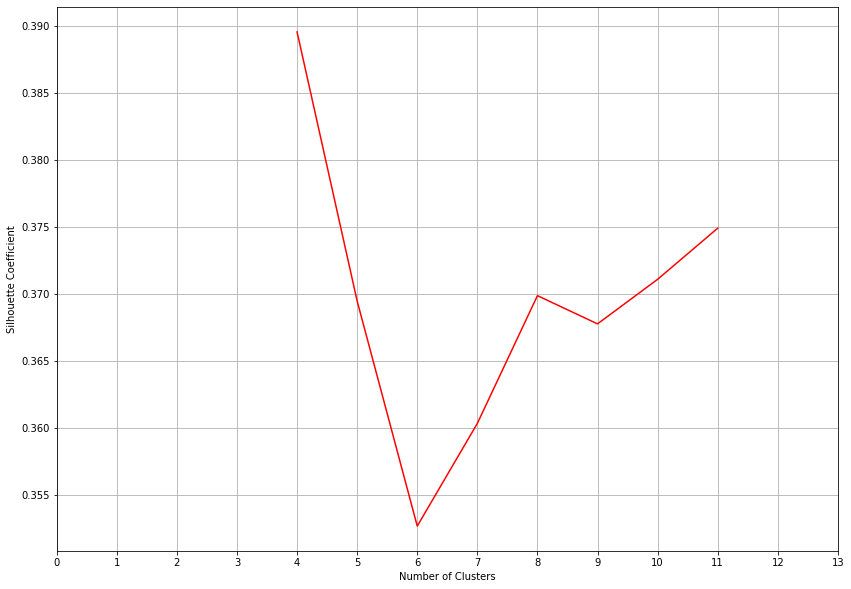

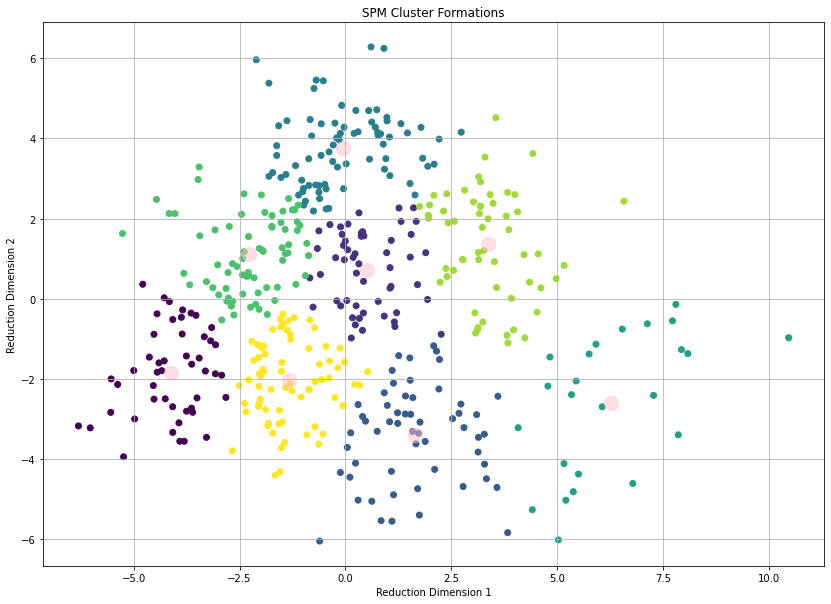

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/SportAnalytics/SPM_folder/SPM_1999_2000.csv')

temp = SPMcluster(dataframe)
temp.clusteroptimisation(choice = "PCA")
data_frame = temp.playerstat(choice = 'PCA', numberofClusters = 8)

In [ ]:
dataframe2 = pd.read_csv('/content/drive/MyDrive/SportAnalytics/SPM_folder/Season_SPM20032004.csv')

temp = SPMcluster(dataframe2)
temp.clusteroptimisation(choice = "PCA")
data_frame = temp.playerstat(choice = 'PCA', numberofClusters = 9)

In [ ]:
dataframe2 

,player,team,BadPass,LostBall,Shootfoul,Offensivefoul,Shootdrawn,PGA,And1,Blkd,FG%,Dist.,f2P,f2P03,f2P310,f2P1016,f2P163P,f3P,f3P03,f3P310,f3P1016,f163P,DunkFGA,PER,TS%,3PAr,FTr,ORB%,DRB%,AST%,STL%,BLK%,TOV%,USG%,ORAPM,DRAPM
0,Alan Henderson,Atlanta,3,0,1,0,2,4,0,2,0.476,6.7,1.000,0.476,0.190,0.190,0.143,0.000,0.600,0.000,0.500,0.667,0.000,0.508,0.000,0.286,18.500,16.5,17.5,5.2,0.8,2.2,11.3,17.8,-0.2817,-0.4745
1,Bob Sura,Atlanta,35,18,16,9,60,332,10,18,0.420,8.3,0.862,0.532,0.090,0.064,0.176,0.138,0.482,0.214,0.300,0.491,0.010,0.521,0.138,0.503,8.400,17.9,13.2,26.3,1.4,0.4,14.8,21.3,2.2496,-0.7742
2,Boris Diaw,Atlanta,72,21,97,12,33,411,4,15,0.447,8.5,0.917,0.457,0.125,0.147,0.188,0.083,0.545,0.308,0.370,0.458,0.070,0.483,0.083,0.297,6.600,13.5,10.1,14.9,1.6,1.4,26.3,11.4,-1.6810,-0.6754
3,Chris Crawford,Atlanta,21,18,68,9,51,103,10,30,0.448,13.2,0.760,0.274,0.108,0.119,0.259,0.240,0.628,0.373,0.286,0.418,0.074,0.544,0.240,0.253,5.500,10.9,8.2,7.0,1.6,1.2,9.5,21.8,0.7993,-1.8438
4,Dan Dickau,Atlanta,4,7,9,0,1,37,0,2,0.429,12.0,0.796,0.286,0.204,0.082,0.224,0.204,0.643,0.100,0.250,0.636,0.000,0.474,0.204,0.122,3.200,9.4,6.3,22.3,3.3,0.0,20.1,20.6,-0.1727,-0.5595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Kwame Brown,Washington,42,51,73,20,151,248,25,45,0.489,4.8,0.997,0.475,0.355,0.134,0.032,0.003,0.657,0.383,0.215,0.316,0.129,15.700,0.547,0.003,0.567,8.7,19.2,8.8,1.5,1.7,16.0,17.3,1.0151,-0.4159
493,Larry Hughes,Washington,69,51,55,21,151,324,27,75,0.397,13.8,0.770,0.243,0.123,0.126,0.278,0.230,0.584,0.266,0.386,0.345,0.017,17.600,0.496,0.230,0.332,5.1,12.9,14.3,2.4,0.9,11.6,28.1,-0.8992,0.1198
494,Lonny Baxter,Washington,2,3,13,0,6,12,0,4,0.500,9.2,0.969,0.344,0.156,0.219,0.250,0.031,0.818,0.400,0.286,0.375,0.063,12.900,0.550,0.031,0.375,9.1,17.5,6.6,0.8,2.7,11.8,14.2,-0.8274,-0.4924
495,Mitchell Butler,Washington,14,7,31,3,10,74,2,13,0.435,12.3,0.758,0.323,0.129,0.113,0.194,0.242,0.625,0.250,0.286,0.417,0.008,9.300,0.498,0.242,0.194,4.7,9.8,9.7,2.1,0.5,15.1,12.7,0.6885,1.1963


In [ ]:
data_frame
tempstat = data_frame.groupby(data_frame.player) 
currentcluster =tempstat.get_group('Matt Carroll') 

currentcluster 


,player,team,SPM
384,Matt Carroll,Portland,2
425,Matt Carroll,San Antonio,7


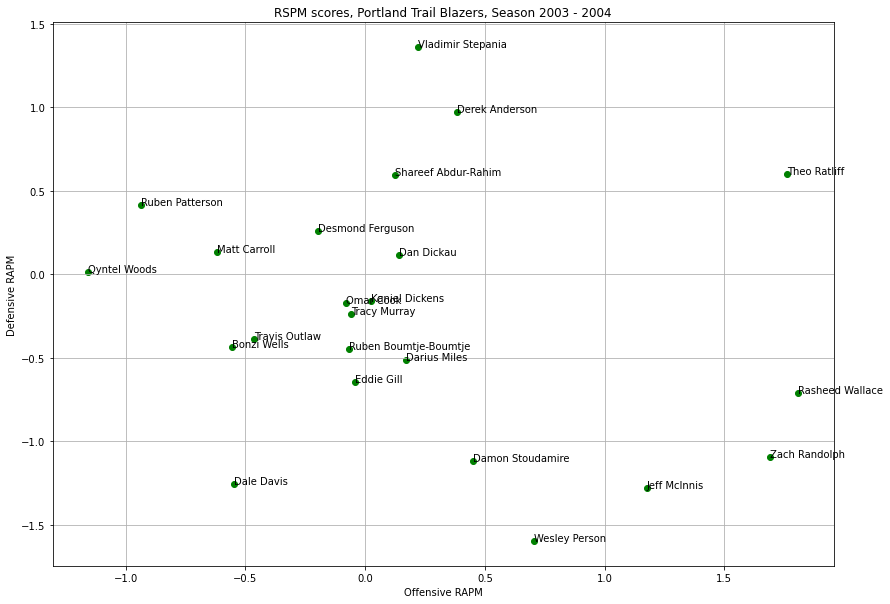

In [ ]:
tempstat = dataframe2.groupby(dataframe2.team) 
currentstat = tempstat.get_group('Portland')
ORAPM2005 = currentstat['ORAPM'].tolist() 
DRAPM2005 = currentstat['DRAPM'].tolist() 
players = currentstat['player'].tolist()

plt.figure(figsize=(14, 10))
l = len(players)

for i in range(l):
  plt.scatter( ORAPM2005[i], DRAPM2005[i], color = 'green')
  plt.text(ORAPM2005[i], DRAPM2005[i], players[i], fontsize=10)
    
plt.grid(True) 
plt.title('RSPM scores, Portland Trail Blazers, Season 2003 - 2004')
plt.xlabel("Offensive RAPM")
plt.ylabel("Defensive RAPM") 
plt.show()

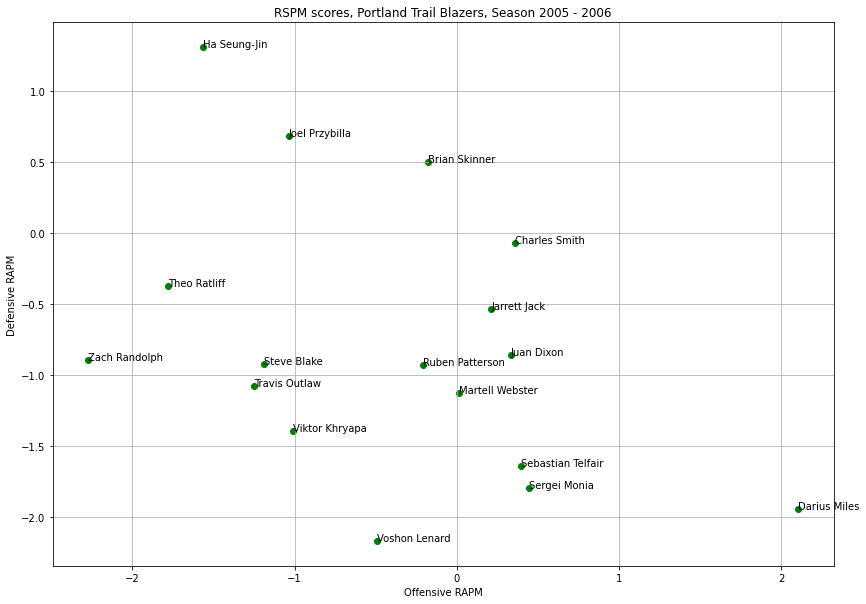

In [ ]:
dataframe2 = pd.read_csv('/content/drive/MyDrive/SportAnalytics/SPM_folder/season20052006_SPM.csv')

tempstat = dataframe2.groupby(dataframe2.team) 
currentstat = tempstat.get_group('Portland')
ORAPM2005 = currentstat['ORAPM'].tolist() 
DRAPM2005 = currentstat['DRAPM'].tolist() 
players = currentstat['player'].tolist()

plt.figure(figsize=(14, 10))
l = len(players)

for i in range(l):
  plt.scatter( ORAPM2005[i], DRAPM2005[i], color = 'green')
  plt.text(ORAPM2005[i], DRAPM2005[i], players[i], fontsize=10)
    
plt.grid(True) 
plt.title('RSPM scores, Portland Trail Blazers, Season 2005 - 2006')
plt.xlabel("Offensive RAPM")
plt.ylabel("Defensive RAPM") 
plt.show()

In [ ]:
class bestsquad: 
  def __init__(self, dfstat, method = 'PCA' ):
    # two variables will be used through the current object class 
    # the aim is to assess the most optimal squads on the court
    # the default method is PCA, the alternative is isomap
    # to assign the "correct season" 
    temp_tot_frame = dfstat 
    trainingmodel = SPMcluster(temp_tot_frame)  
    labels = trainingmodel.SPMclustering(numberofClusters = 8, choice = method)  
    # to assign each player with a cluster 
    players = dfstat['player'] 
    teams = dfstat['team'] 
    df_players_clusters = pd.DataFrame(list(zip(players, teams, labels)),
               columns =['players', 'team', 'cluster']) 
    self.teamstat = df_players_clusters

  def assign_players(self, team = 'Portland'):
    teamstat = self.teamstat
    # to group the dataframe with the name of the team
    tempstat = teamstat.groupby(teamstat.team) 
    currentteam =tempstat.get_group(team) 
    players = currentteam['players'].tolist() 
    clusterlabel = currentteam['cluster'].tolist()
    # to store all the players in a dictionary 
    playerbank = dict() 
    L = len(players) 

    for i in range(L): 
      player = players[i]
      playerbank[player] = clusterlabel[i]
    return playerbank

  def lineups(self, dflineup, team = 'Portland'): 
    # to generate a list of player combinations
    lineupstat = dflineup 
    # to segment one team out of the line ups 
    index2 = np.where(lineupstat['Team']=='Portland') 
    index = np.asarray(index2).flatten()
    player1 = dflineup['player 1'].tolist()
    player2 = dflineup['player 2'].tolist()
    player3 = dflineup['player 3'].tolist()
    player4 = dflineup['player 4'].tolist()
    player5 = dflineup['player  5'].tolist()

    # to track down the cluster labels 
    cluster_bank = self.assign_players(team = team) 

    # to store the clusters in in a list
    squad_combination = [ ]
    squad_list = [ ]

    for ind in index: 
      p1 = cluster_bank[player1[ind]]
      squad_combination.append(p1) 
      p2 = cluster_bank[player2[ind]]
      squad_combination.append(p2) 
      p3 = cluster_bank[player3[ind]]
      squad_combination.append(p3) 
      p4 = cluster_bank[player4[ind]]
      squad_combination.append(p4) 
      p5 = cluster_bank[player5[ind]]
      squad_combination.append(p5)  
      squad_list.append(squad_combination)
      squad_combination = [ ] 

    return     squad_list


In [ ]:
class playerstat: 
  def __init__(self, dfstat, dfplayers, method = 'PCA'):
    # two variables will be used through the current object class 
    # two methods are included, PCA or isomap
    # the default method is PCA, the alternative is isomap
    temp_tot_frame = dfstat 
    trainingmodel = SPMcluster(temp_tot_frame)  
    labels = trainingmodel.SPMclustering(numberofClusters = 8, choice = method) 
    # to assign each player with a cluster 
    players = dfstat['player'] 
    teams = dfstat['team'] 
    df_players_clusters = pd.DataFrame(list(zip(players, teams, labels)),
               columns =['players', 'team', 'cluster']) 
    self.player_clusters = df_players_clusters  
    self.playerstat = dfplayers
    self.playerdict = {}

  def player_cluster(self): 
    # to store all players into the dictionary 
    players = self.player_clusters
    dimension = players.shape[0] 
    player_list = players['players'].tolist() 
    team_list = players['team'].tolist() 
    cluster = players['cluster'] 
    for i in range(dimension): 
      current_player = (player_list[i], team_list[i]) 
      self.playerdict[current_player] = cluster[i]
    return self.playerdict


  def gameanalysis_dataframe(self, game_number =1):   
    # game number indicates which game I would like to include, in the current study
    playerstat = self.playerstat  

    # all the players from that season 
    playerbank = self.player_cluster() 

    game_player_total = playerstat.groupby(playerstat.game) 
    # to select the current game 
    currentgame = game_player_total.get_group(game_number) 
    
    game_result = currentgame['result'].unique()
    # to assess winning and lossing
    skillnad = game_result[0]-game_result[1]  
    player = currentgame['player'].tolist() 
    team = currentgame['team'].tolist()

    # I need to store the result in a smart way
    timelist = currentgame['play time'].tolist()

    # the total number of players 
    L = len(currentgame['play time'] ) 

    # to create an empty dictionary now
    game_player_dict = {} 

    for i in range(L): 
      playerinfo = (player[i], team[i])
      cluster = playerbank[playerinfo]
      if team[i] != 'Portland':
        teamC = 'opponent'
      else: 
        teamC = 'Portland'

      clusterinfo = (cluster, teamC)

      if clusterinfo not in game_player_dict:
        game_player_dict[clusterinfo] = timelist[i]
      else:
        game_player_dict[clusterinfo] += timelist[i]
      
    return game_player_dict

  def create_new_dataframe(self): 
    # to create a new dataframe 
    # to create 16 empty lists for futural storage
    H0 = []
    H1 = []
    H2 = []
    H3 = []
    H4 = []
    H5 = []
    H6 = []
    H7 = []
    H8 = []

    O0 = []
    O1 = []
    O2 = []
    O3 = []
    O4 = []
    O5 = []
    O6 = []
    O7 = []
    O8 = []

    opponent = [] 
    home = []

    for i in range(82): 
      playerbank = self.gameanalysis_dataframe(game_number =(i+1))
      for i in range(9): 
        temp1 = (i, 'opponent')
        temp2 = (i, 'Portland') 
        if temp1 not in playerbank: 
          opponent.append(0.000000)
        else: 
          time = playerbank[(i, 'opponent')] 
          opponent.append(time) 

        if temp2 not in playerbank: 
          home.append(0.000000)
        else: 
          time = playerbank[(i, 'Portland')] 
          home.append(time)
      H0.append(home[0])
      H1.append(home[1])
      H2.append(home[2])
      H3.append(home[3])
      H4.append(home[4])
      H5.append(home[5])
      H6.append(home[6])
      H7.append(home[7]) 
      H8.append(home[8]) 
      O0.append(opponent[0])
      O1.append(opponent[1])
      O2.append(opponent[2])
      O3.append(opponent[3])
      O4.append(opponent[4])
      O5.append(opponent[5])
      O6.append(opponent[6])
      O7.append(opponent[7]) 
      O8.append(opponent[8])
      opponent = [] 
      home = []

   # to create a data frame
    clustergame_home = pd.DataFrame(list(zip(H0, H1, H2, H3, H4, H5, H6, H7, H8)),
               columns =['Home_cluster1', 'Home_cluster2', 'Home_cluster3', 'Home_cluster4',
                         'Home_cluster5', 'Home_cluster6', 'Home_cluster7', 'Home_cluster8', 
                         'Home_cluster9']) 
    clustergame_opponents = pd.DataFrame(list(zip(O0, O1, O2, O3, O4, O5, O6, O7, O8)),
               columns =['opponent_cluster1', 'opponent_cluster2', 'opponent_cluster3', 'opponent_cluster4',
                         'opponent_cluster5', 'opponent_cluster6', 'opponent_cluster7', 'opponent_cluster8', 
                         'opponent_cluster9'])  
    gamestat = pd.concat([clustergame_home, clustergame_opponents], axis=1, join='inner')

    return gamestat

    def create_new_dataframe2(self): 
      # to create a new dataframe 
      # to create 16 empty lists for futural storage
      H0 = []
      H1 = []
      H2 = []
      H3 = []
      H4 = []
      H5 = []
      H6 = []
      H7 = []
      H8 = []

      O0 = []
      O1 = []
      O2 = []
      O3 = []
      O4 = []
      O5 = []
      O6 = []
      O7 = []
      O8 = []

      opponent = [] 
      home = []

      for i in range(82): 
        playerbank = self.gameanalysis_dataframe(game_number =(i+1))
        for i in range(9): 
          temp1 = (i, 'opponent')
          temp2 = (i, 'Portland') 
          if temp1 not in playerbank: 
            opponent.append(0.000000)
          else: 
            time = playerbank[(i, 'opponent')] 
            opponent.append(time) 

          if temp2 not in playerbank: 
            home.append(0.000000)
          else: 
            time = playerbank[(i, 'Portland')] 
            home.append(time)
        H0.append(home[0])
        H1.append(home[1])
        H2.append(home[2])
        H3.append(home[3])
        H4.append(home[4])
        H5.append(home[5])
        H6.append(home[6])
        H7.append(home[7]) 
        H8.append(home[8]) 
  

        O0.append(opponent[0])
        O1.append(opponent[1])
        O2.append(opponent[2])
        O3.append(opponent[3])
        O4.append(opponent[4])
        O5.append(opponent[5])
        O6.append(opponent[6])
        O7.append(opponent[7]) 
        O8.append(opponent[8]) 

        opponent = [] 
        home = []

    # to create a data frame
      clustergame_home = pd.DataFrame(list(zip(H0, H1, H2, H3, H4, H5, H6, H7, H8)),
               columns =['Home_cluster1', 'Home_cluster2', 'Home_cluster3', 'Home_cluster4',
                         'Home_cluster5', 'Home_cluster6', 'Home_cluster7', 'Home_cluster8',
                         'Home_cluster9']) 
      clustergame_opponents = pd.DataFrame(list(zip(O0, O1, O2, O3, O4, O5, O6, O7, O8)),
               columns =['opponent_cluster1', 'opponent_cluster2', 'opponent_cluster3', 'opponent_cluster4',
                         'opponent_cluster5', 'opponent_cluster6', 'opponent_cluster7', 'opponent_cluster8',
                         'opponent_cluster9'])  
      gamestat = pd.concat([clustergame_home, clustergame_opponents], axis=1, join='inner')

    return gamestat


In [ ]:
game_player_df = pd.read_csv('/content/drive/MyDrive/SportAnalytics/SPM_folder/gamestat-9900.csv')
dataframe = pd.read_csv('/content/drive/MyDrive/SportAnalytics/SPM_folder/SPM_1999_2000.csv')

temp = playerstat(dataframe, game_player_df, method = 'PCA')
temp.player_cluster()
#SPMcluster1999 = temp.create_new_dataframe( )

#SPMcluster1999.to_csv('/content/drive/MyDrive/SportAnalytics/gradientBoost/SPMplayers1999.csv') 

In [ ]:
game_player_df

,player,team,play time,result,game,home game
0,Lamar Odom,Clippers,44.350000,98,2,no
1,Maurice Taylor,Clippers,39.866667,98,2,no
2,Derek Anderson,Clippers,35.216667,98,2,no
3,Michael Olowokandi,Clippers,25.266667,98,2,no
4,Eric Murdock,Clippers,21.283333,98,2,no
...,...,...,...,...,...,...
1636,Stacey Augmon,Portland,26.100000,95,82,yes
1637,Detlef Schrempf,Portland,24.000000,95,82,yes
1638,Greg Anthony,Portland,24.000000,95,82,yes
1639,Bonzi Wells,Portland,23.383333,95,82,yes


In [ ]:
game_player_df = pd.read_csv('/content/drive/MyDrive/SportAnalytics/SPM_folder/matchresults_season_2003_2004.csv')
dataframe = pd.read_csv('/content/drive/MyDrive/SportAnalytics/SPM_folder/Season20032004_player_SPM.csv')

In [ ]:
game_player_df

,player,play time,team,result,game,home game,Unnamed: 6
0,Carlos Arroyo,41.716667,Utah,99,1,no,NaN
1,Greg Ostertag,40.916667,Utah,99,1,no,NaN
2,Andrei Kirilenko,31.433333,Utah,99,1,no,NaN
3,Matt Harpring,29.316667,Utah,99,1,no,NaN
4,DeShawn Stevenson,22.116667,Utah,99,1,no,NaN
...,...,...,...,...,...,...,...
1603,Dan Dickau,12.616667,Portland,104,82,yes,NaN
1604,Dale Davis,11.233333,Portland,104,82,yes,NaN
1605,Travis Outlaw,7.566667,Portland,104,82,yes,NaN
1606,Qyntel Woods,4.550000,Portland,104,82,yes,NaN


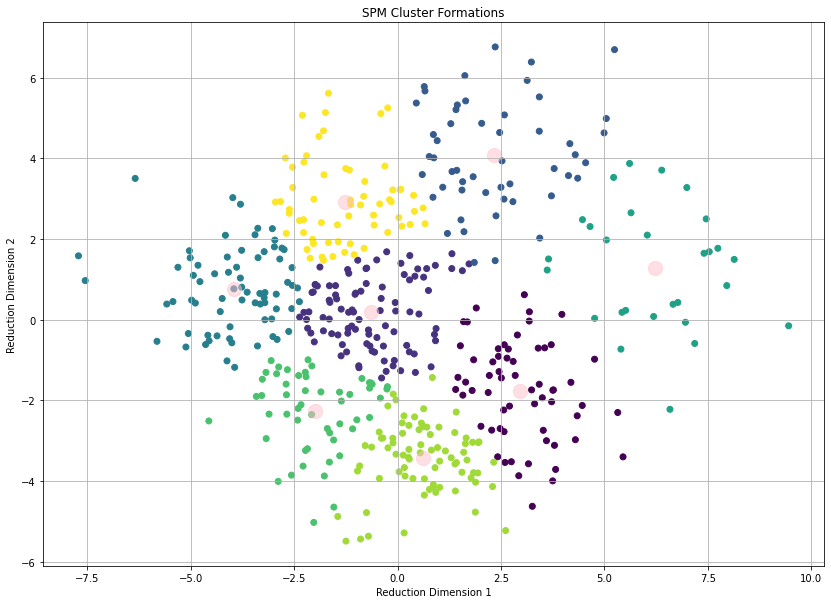

In [ ]:
temp1 = playerstat(dataframe, game_player_df, method = 'PCA')
bank2 = temp1.player_cluster()
bank2
SPMcluster2003 = temp1.create_new_dataframe( )
SPMcluster2003.to_csv('/content/drive/MyDrive/SportAnalytics/gradientBoost/SPMplayers2003alt.csv') 

In [ ]:
df_2005 = pd.read_csv('/content/drive/MyDrive/SPM_folder/SPM dataframes/SPM_df_2005_2006.csv')
df_2005.sort_values('SPM')

,Unnamed: 0,player,team,SPM
109,109,Tayshaun Prince,Detroit,0
350,350,Andre Iguodala,Philadelphia,0
463,463,Charlie Villanueva,Toronto,0
81,81,Devin Harris,Dallas,0
353,353,John Salmons,Philadelphia,0
...,...,...,...,...
197,197,Chris Mihm,LAL,7
178,178,Chris Kaman,LAC,7
169,169,Jonathan Bender,Indiana,7
297,297,Chris Andersen,NewOrleans,7
